****TEXT CLASSSIFICATION****

******SPAM AND HAM EMAIL*******

HEY,my name is temitope and you are welcome to my kernel,

today from the study i  have made,i can boldly give you a run down on the level of text clssification based om the 

project topic CLASSIFICATION OF SPAM AND EMAIL,

so while doing this we would make some findings as regatds knowing the amount of spam and ham messages....

also filtering the messages,because thats actually the major....

We will extract TF-IDF features from the messages using

techniques like, Feature Extraction and Preprocessing, and classify

the messages using logistic regression.

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model.logistic import LogisticRegression


In [22]:
df = pd.read_csv('sspam.csv',header = None,encoding = 'latin-1')
df.head()

,0,1,2,3,4
0,v1,v2,NaN,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [25]:
#so i decided to drop the remaning useless columns,well they look useless to me!!!
df.drop([2,3,4],axis=1, inplace= True)

In [26]:
df.head()

,0,1
0,v1,v2
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...


In [32]:
print ('Number of spam messages:', df[df[0] == 'spam'][0].count())
print ('Number of ham messages:', df[df[0] == 'ham'][0].count())


Number of spam messages: 747
Number of ham messages: 4825


In [129]:
df.count()

0    5573
1    5573
dtype: int64

A binary label and a text message comprise each row. The data set contains 5,573

instances; 4,825 messages are ham and the remaining 747 messages are spam. The

ham messages are labeled with zero, and the spam messages are labeled with one. 

In [40]:
#Extract SPAM messages
spam_messages = df[df[0]=="spam"]
spam_messages.head() #Display first 5 rows of SPAM messages

,0,1
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
6,spam,FreeMsg Hey there darling it's been 3 week's n...
9,spam,WINNER!! As a valued network customer you have...
10,spam,Had your mobile 11 months or more? U R entitle...
12,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [41]:
#Find count and unique messages count of SPAM messages.
spam_messages.describe()

,0,1
count,747,747
unique,1,653
top,spam,Please call our customer service representativ...
freq,747,4


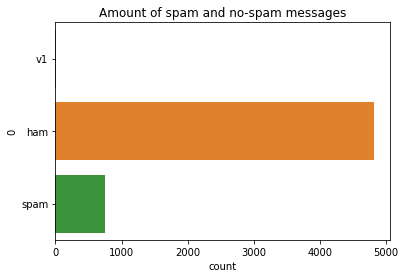

In [115]:
#Plot the counts of HAM (non SPAM) vs SPAM
sns.countplot(data = df, y= df[0]).set_title("Amount of spam and no-spam messages")
plt.show()

lets split our data into test and train.....

In [118]:
data_train, data_test, labels_train, labels_test = train_test_split(df[1],df[0],test_size=0.4,random_state=0) 
print("data_train, labels_train : ",data_train.shape, labels_train.shape)
print("data_test, labels_test: ",data_test.shape, labels_test.shape)

data_train, labels_train :  (3343,) (3343,)
data_test, labels_test:  (2230,) (2230,)


**Extraction & CountVectorize**


*The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.*

In this same context we have fit and transform,

in which FIT:build dict(i.e, word->wordID)
    TRANSFORM :Convert document(i.e, each line in the file) to word vector

In [119]:
vectorizer = CountVectorizer() 
df_train_count = vectorizer.fit_transform(data_train)
df_test_count  = vectorizer.transform(data_test)

**Modelling & training**

Multinomial Naive Bayes is a specialized version of Naive Bayes that is designed more for text documents. Whereas simple naive Bayes would model a document as the presence and absence of particular words, multinomial naive bayes explicitly models the word counts and adjusts the underlying calculations to deal with in.

It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [120]:
clf = MultinomialNB()
clf.fit(df_train_count, labels_train)
predictions = clf.predict(df_test_count)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

 we create an instance of LogisticRegression and train our model. Like
LinearRegression, LogisticRegression implements the fit() and predict()
methods. As a sanity check, we printed a few predictions for manual inspection:

In [125]:
from sklearn.linear_model.logistic import LogisticRegression

classifier = LogisticRegression()
classifier.fit(df_train_count, labels_train)
predictions = classifier.predict(df_test_count)
for i, prediction in enumerate(predictions[:6]):
    print ('Prediction: %s. Message: %s' % (prediction, df_test_count[i]))


Prediction: ham. Message:   (0, 870)	1
  (0, 925)	1
  (0, 1308)	1
  (0, 2656)	1
  (0, 3187)	1
  (0, 3591)	1
  (0, 3732)	1
  (0, 4157)	1
  (0, 5309)	1
  (0, 5377)	1
  (0, 5809)	2
  (0, 6391)	1
  (0, 6455)	1
  (0, 6567)	1
Prediction: ham. Message:   (0, 647)	1
  (0, 870)	1
  (0, 967)	1
  (0, 1318)	1
  (0, 1358)	1
  (0, 2982)	1
  (0, 3616)	1
  (0, 4089)	1
  (0, 5803)	1
  (0, 6567)	1
Prediction: ham. Message:   (0, 690)	1
  (0, 706)	1
  (0, 1879)	1
  (0, 2065)	1
  (0, 2529)	1
  (0, 2670)	1
  (0, 2677)	1
  (0, 3574)	1
  (0, 3960)	2
  (0, 4173)	1
  (0, 6024)	1
Prediction: ham. Message:   (0, 339)	1
  (0, 888)	1
  (0, 898)	1
  (0, 1048)	1
  (0, 1069)	1
  (0, 1358)	1
  (0, 2015)	1
  (0, 2021)	1
  (0, 2059)	1
  (0, 2838)	1
  (0, 3050)	2
  (0, 3422)	1
  (0, 3807)	1
  (0, 3875)	1
  (0, 4101)	1
  (0, 4134)	1
  (0, 4168)	1
  (0, 4183)	1
  (0, 4559)	1
  (0, 5207)	1
  (0, 5417)	1
  (0, 5803)	1
  (0, 5912)	1
  (0, 6276)	1
  (0, 6436)	1
  (0, 6442)	1
  (0, 6567)	2
Prediction: ham. Message:   (0, 690)	1

In [122]:
print ("accuracy_score : ", accuracy_score(labels_test, predictions))

accuracy_score :  0.9802690582959641


**Confusion Matrix**


*A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.*

In [123]:
print ("confusion_matrix : \n", confusion_matrix(labels_test, predictions))

confusion_matrix : 
 [[1922    4]
 [  40  264]]


[[1922   40]
 [   4  264]]


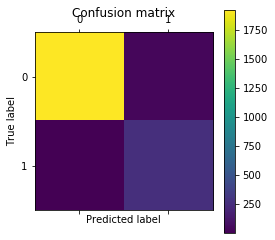

In [130]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(predictions, labels_test)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


The confusion matrix indicates that there were

1922  true negative predictions,

264 true positive predictions,

4 false negative predictions,

and 264 false positive predictions. 

***CONCLUSION OF MY TEXT CLASSIFICATION***

..PLS DO CHECK AND GIVE ME A COMMENT.....

THANKS AND SEE YOU IN MY NEXT WORKBOOK!!!!!!


